<a href="https://colab.research.google.com/github/Abbud123/skills-introduction-to-github/blob/My-first-Branch/Lab_23%2624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#lab 23 stats from here
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

text = "Wow!! NLP is amazing. It's transforming the world of AI!!! #excited"

text = text.lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
tokens = re.findall(r'\b\w+\b', text)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
print("Tokens after stopword removal:", tokens)

documents = [
    "I love this movie",
    "This film is terrible",
    "Amazing acting and great plot",
    "Worst movie ever"
]
labels = [1, 0, 1, 0]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
print("Features:", vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", X.toarray())
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions))

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))

Tokens after stopword removal: ['wow', 'nlp', 'amazing', 'transforming', 'world', 'ai', 'excited']
Features: ['acting' 'amazing' 'film' 'great' 'love' 'movie' 'plot' 'terrible'
 'worst']
TF-IDF Matrix:
 [[0.         0.         0.         0.         0.78528828 0.6191303
  0.         0.         0.        ]
 [0.         0.         0.70710678 0.         0.         0.
  0.         0.70710678 0.        ]
 [0.5        0.5        0.         0.5        0.         0.
  0.5        0.         0.        ]
 [0.         0.         0.         0.         0.         0.6191303
  0.         0.         0.78528828]]
Logistic Regression Accuracy: 0.5
Naive Bayes Accuracy: 0.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.5


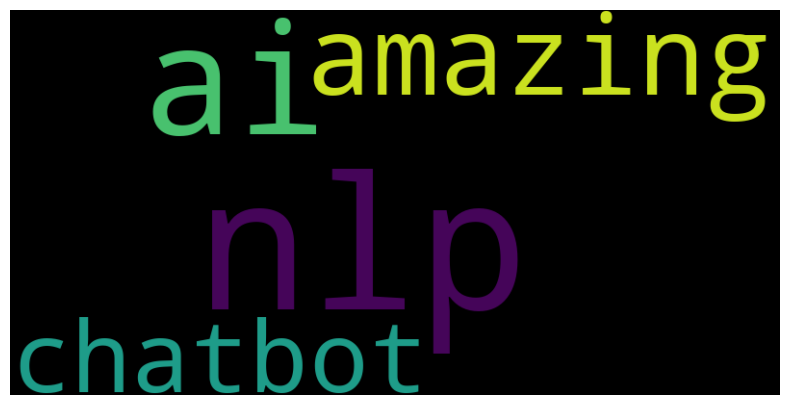

In [7]:
#lab 24 stats from here
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

tokens = ["nlp", "amazing", "nlp", "ai", "chatbot", "ai", "nlp"]

word_freq = Counter(tokens)

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




In [8]:
import re

def chatbot_response(user_input):
    user_input = user_input.lower()
    if re.search(r"\bhello\b", user_input):
        return "Hi! How can I help you today?"
    elif re.search(r"\bbye\b", user_input):
        return "Goodbye! Have a nice day."
    elif re.search(r"\bthanks\b|\bthank you\b", user_input):
        return "You're welcome!"
    elif re.search(r"\bhow are you\b", user_input):
        return "I'm just a bot, but I'm here to help!"
    elif re.search(r"\bhelp\b", user_input):
        return "Sure, I'm here to help. Please tell me your question."
    else:
        return "Sorry, I didn't understand that."

if __name__ == "__main__":
    print("Chatbot is running. Type 'exit' to stop.")
    while True:
        user = input("You: ")
        if user.lower() == "exit":
            print("Bot: Goodbye!")
            break
        print("Bot:", chatbot_response(user))

Chatbot is running. Type 'exit' to stop.
You: hi
Bot: Sorry, I didn't understand that.
You: hey
Bot: Sorry, I didn't understand that.
You: bye
Bot: Goodbye! Have a nice day.
You: hello
Bot: Hi! How can I help you today?
You: exit
Bot: Goodbye!
